In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
% matplotlib inline
import pickle
from IPython.display import display

In [2]:
r = pickle.load(open('allData500.csv'))
# pp.pprint(r)
df = pd.DataFrame.from_dict(r)
display(df)

,acceptedAnswerId,acceptedAnswerScore,averageLengthOfCodeSnippet,englishNumChars,englishNumWords,link,numQuestionMarks,numberImages,numberLinks,numberOfCodeSnippets,totalLinesOfCode,viewCount
0,231855,9571.0,6.500000,413,71,http://stackoverflow.com/questions/231767/what...,7,0,1,2,13,1291901
1,100146,NaN,0.000000,48,8,http://stackoverflow.com/questions/100003/what...,2,0,0,0,0,480518
2,394814,NaN,0.000000,120,18,http://stackoverflow.com/questions/394809/does...,1,0,0,0,0,908596
3,419185,NaN,13.000000,20,4,http://stackoverflow.com/questions/419163/what...,1,0,0,1,13,1114023
4,89243,2594.0,0.000000,129,24,http://stackoverflow.com/questions/89228/calli...,1,0,0,0,0,1910576
5,26853961,1898.0,7.000000,361,63,http://stackoverflow.com/questions/38987/how-t...,1,0,0,1,7,787899
6,613218,NaN,0.000000,444,86,http://stackoverflow.com/questions/613183/sort...,1,0,1,0,0,1292558
7,273227,NaN,7.500000,313,56,http://stackoverflow.com/questions/273192/how-...,2,0,0,2,15,1243517
8,739665,NaN,2.500000,223,36,http://stackoverflow.com/questions/739654/how-...,1,0,0,2,5,383584
9,423596,2776.0,0.000000,195,35,http://stackoverflow.com/questions/423379/usin...,2,0,0,0,0,1997051


In [3]:
def quickplot(df, x, y):
    plt.plot(df[x], df[y], '*')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    
def dividedByMax(df, col_name):
    dbm_col_name = col_name + 'DividedByMax'
    df[dbm_col_name] = df[col_name].div(df[col_name].max())
    return df

def normalize(df, col_name):
    normalized_col_name = col_name + 'Normalized'
    df[normalized_col_name] = (df[col_name] - df[col_name].mean()) / (df[col_name].max() - df[col_name].min())
    return df

def dividedByViewCount(df, col_name):
    dvc_col_name = col_name + 'DividedByViewCount'
    df[dvc_col_name] = df[col_name].div(df['viewCount'])
    return df

In [4]:
### Normalized dataframe columns
# df = normalize(df, 'totalLinesOfCode')
# df = dividedByMax(df, 'acceptedAnswerScore')
# df = normalize(df, 'acceptedAnswerScore')

df = dividedByViewCount(df, 'acceptedAnswerScore')
display(df.head())

,acceptedAnswerId,acceptedAnswerScore,averageLengthOfCodeSnippet,englishNumChars,englishNumWords,link,numQuestionMarks,numberImages,numberLinks,numberOfCodeSnippets,totalLinesOfCode,viewCount,acceptedAnswerScoreDividedByViewCount
0,231855,9571.0,6.5,413,71,http://stackoverflow.com/questions/231767/what...,7,0,1,2,13,1291901,0.007408
1,100146,NaN,0.0,48,8,http://stackoverflow.com/questions/100003/what...,2,0,0,0,0,480518,NaN
2,394814,NaN,0.0,120,18,http://stackoverflow.com/questions/394809/does...,1,0,0,0,0,908596,NaN
3,419185,NaN,13.0,20,4,http://stackoverflow.com/questions/419163/what...,1,0,0,1,13,1114023,NaN
4,89243,2594.0,0.0,129,24,http://stackoverflow.com/questions/89228/calli...,1,0,0,0,0,1910576,0.001358


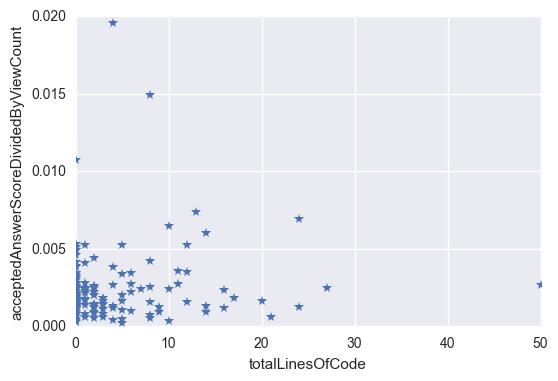

In [5]:
quickplot(df, 'totalLinesOfCode', 'acceptedAnswerScoreDividedByViewCount')

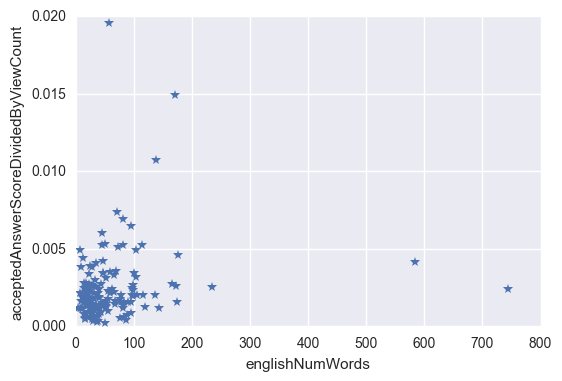

In [6]:
quickplot(df, 'englishNumWords', 'acceptedAnswerScoreDividedByViewCount')

In [ ]:
quickplot(df, 'numberOfCodeSnippets', 'acceptedAnswerScoreDividedByViewCount')